<div style="border:solid black 2px; padding: 20px">

# Reviewer's Introduction

Halo Mufti!

Saya Yosef, pada kesempatan kali ini saya akan memeriksa proyek kamu.

Kamu bisa melihat komentar saya di bagian bawah kode - tolong **jangan dipindah, diubah, atau dihapus** ya supaya saya bisa cek kembali ketika sudah kamu perbaiki.
    
Komentar dari saya bisa dalam kotak berwarna hijau, kuning, atau merah sebagai berikut

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Bagus, semua berjalan lancar.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Ada catatan.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Perlu perbaikan.
</div>

Mufti bisa merespon komentar saya dengan kotak berwarna biru, seperti ini

<div class="alert alert-block alert-info">
<b>Student's comment</b> <a class="tocSkip"></a>
    
Baik kak. <a class="tocSkip"></a>
</div>
    
Mohon diingat beberapa hal penting terkait proyek ini:
- proyek belum bisa diterima jika masih ada komentar dengan kotak berwarna merah
- tenang saja, kamu punya 3 kali kesempatan memperbaiki
- tapi ingat, pada setiap kesempatan kamu punya waktu maksimal 1 x 24 jam untuk memperbaiki proyek ya
    
</div>

<div style="border:solid black 1px; padding: 20px" class="alert alert-block alert-success">
    
# Reviewer's general feedback v1

Terima kasih sudah mengirimkan proyek ini!
    
Secara umum proyek kamu sudah **sangat baik** dan sudah bisa diterima. Satu catatan positif yang perlu kamu pertahankan adalah menuliskan komentar pada kode yang sangat membantu pembaca dalam memahami kode kamu. Semoga kamu semakin memahami proses analisis dan prediksi keuntungan menggunakan algoritma machine learning dan bootstrapping ya. Tetap semangat dalam perjalanan belajarmu, Mufti!
</div>

# Konten <a id='back'></a>

* [Pendahuluan](#Pendahuluan)
* [Langkah 1 : Explore Data Analysis](#langkah1)
* [Langkah 2 : Latih dan Uji Model di Setiap Wilayah ](#langkah2)
* [Langkah 3 : Persiapan Untuk Menghitung Laba](#langkah3)
* [Langkah 4 : Menghitung Laba Dari Kumpulan Sumur Minyak Terpilih dan Prediksi Model](#langkah4)
* [Langkah 5 : Menghitung Risiko dan Laba Untuk Setiap Wilayah](#langkah5)
* [Kesimpulan](#kesimpulan)

</a>

# Pendahuluan <a id='Pendahuluan'></a>

Anda bekerja di perusahaan tambang minyak bernama OilyGiant. Tugas Anda adalah menemukan lokasi yang cocok untuk penggalian sumur minyak baru.
Berikut adalah langkah-langkah untuk memilih lokasi baru:
- Kumpulkan parameter untuk membangun sumur minyak di beberapa wilayah terpilih: kualitas minyak dan volume cadangan minyak;
- Buatlah sebuah model yang mampu memprediksi volume cadangan minyak di sumur yang baru;
- Pilihlah sumur minyak dengan nilai estimasi tertinggi;
- Pilihlah wilayah dengan total laba tertinggi untuk sumur minyak terpilih;

Anda memiliki data sampel minyak dari tiga wilayah. Parameter setiap sumur minyak di wilayah tersebut sudah diketahui. Buatlah sebuah model yang akan membantu Anda memilih wilayah dengan margin laba tertinggi. Lakukan analisis terhadap laba dan risiko potensial menggunakan teknik bootstrapping.

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Pendahuluan sudah bagus.
</div>

# Langkah 1 : Explore Data  Analysis <a id='langkah1'></a>

In [1]:
#import modul data preprocessing dan manipulation
import pandas as pd
import numpy as np
from scipy import stats as st

#import modul visualisasi
import matplotlib.pyplot as plt

#import modul split data
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#import modul LinearRegression
from sklearn.linear_model import LinearRegression

#import modul metrik regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Pemuatan library sudah bagus.
</div>

In [2]:
#Membaca Data
df_geo_0 = pd.read_csv('/datasets/geo_data_0.csv')
df_geo_1 = pd.read_csv('/datasets/geo_data_1.csv')
df_geo_2 = pd.read_csv('/datasets/geo_data_2.csv')

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Pemuatan dataset sudah bagus.
</div>

In [3]:
#Tabel Deskriptif
df_geo_0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [4]:
df_geo_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
df_geo_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [6]:
df_geo_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [7]:
df_geo_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [8]:
df_geo_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [9]:
df_geo_0.duplicated().sum(), df_geo_1.duplicated().sum(), df_geo_2.duplicated().sum()

(0, 0, 0)

In [10]:
df_geo_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [11]:
df_geo_1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [12]:
df_geo_2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [13]:
df_geo_0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [14]:
df_geo_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [15]:
df_geo_2.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


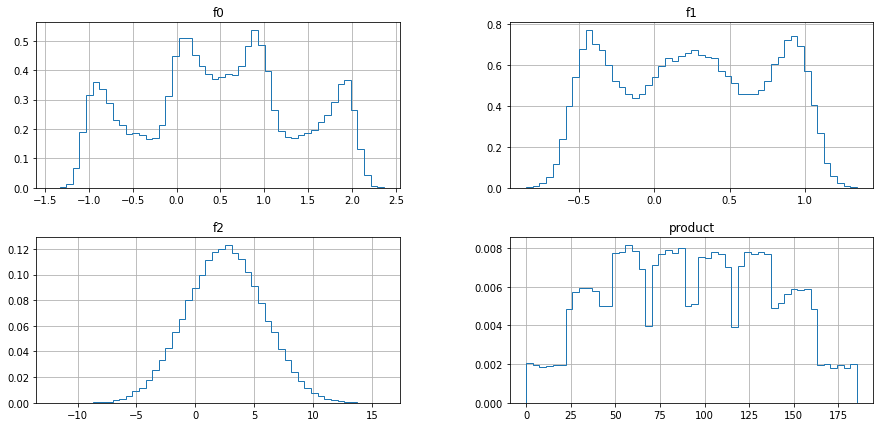

In [16]:
df_geo_0.hist(histtype=u'step', linestyle='solid', bins=50, figsize=(15,7), density=True)
plt.show()

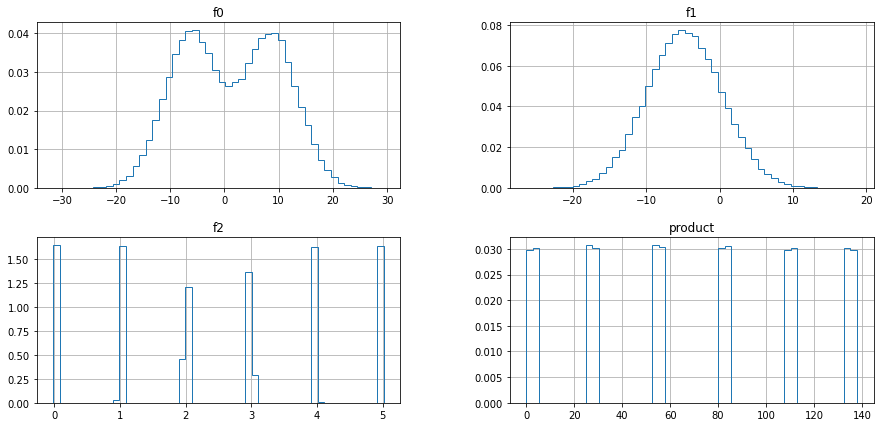

In [17]:
df_geo_1.hist(histtype=u'step', linestyle='solid', bins=50, figsize=(15,7), density=True)
plt.show()

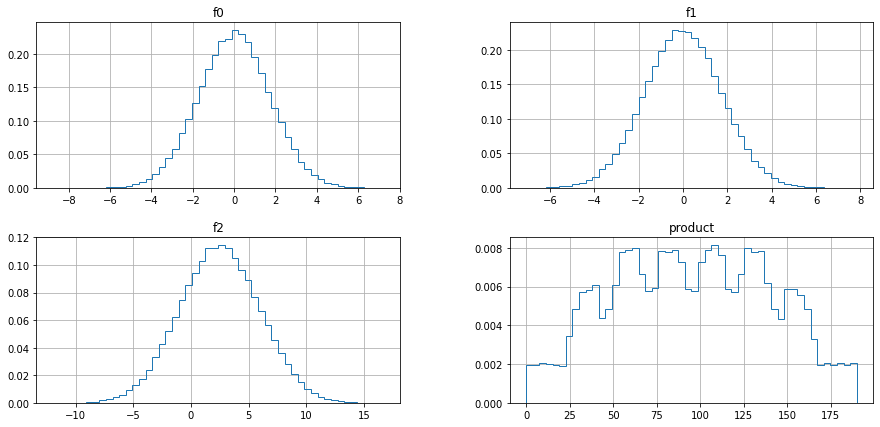

In [18]:
df_geo_2.hist(histtype=u'step', linestyle='solid', bins=50, figsize=(15,7), density=True)
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
*Pada langkah pertama ini kita memuat dataframe geo_data_0, 1 dan 2. Tidak ada nilai null dan duplikat pada ketiga dataframe tersebut.
Dari tabel korelasi dan plot distribusi didapatkan informasi berikut :
     
- df_geo_0 untuk f2 memiliki korelasi positif 0.48 pada product. Dan f2 tersebut memiliki distribusi normal.
- df_geo_1 untuk f2 memiliki korelasi linear pada product. Namun f2 tersebut tidak memiliki distribusi normal.
- df_geo_2 untuk f2 memiliki korelasi positif 0.44 pada product. Dan pada f0, f1, dan f2 memiliki distribusi normal.
     
Langkah selanjutnya adalah melatih dan menguji model di setiap wilayah.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Eksplorasi data awal sudah sangat bagus. Kamu juga sudah menganalisis korelasi dan distribusi, bagus sekali.
</div>

# Langkah 2 : Latih dan Uji Model di Setiap Wilayah <a id='langkah2'></a>

In [20]:
#Fungsi untuk Melatih dan Menguji Model
def modelling(df):
    #Menentukan Target dan Features
    df = df.drop(['id'], axis=1)
    target = df['product']
    features = df.drop(['product'], axis=1)
    
    #Split Data
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345
    )
    
    #Features Scaling
    scaler = StandardScaler()
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    
    #Model Linear Regresi
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = pd.Series(model.predict(features_valid), index=target_valid.index)
    
    #Menghitung rata-rata volume actual dan prediksi
    actual_mean = round(df['product'].mean(),2)
    predicted_valid_mean =  round(predicted_valid.mean(),2)
    
    #Menghitung MSE, RMSE, R2, MAE
    mse = mean_squared_error(target_valid, predicted_valid)
    rmse = round(mse ** 0.5, 2)
    r2 = r2_score(target_valid, predicted_valid)
    mae = mean_squared_error(target_valid, predicted_valid)

    return target_valid, predicted_valid, actual_mean, predicted_valid_mean, rmse

In [21]:
target_valid_0, predicted_valid_0, actual_mean_0, predicted_valid_mean_0, rmse_0 = modelling(df_geo_0)
target_valid_1, predicted_valid_1, actual_mean_1, predicted_valid_mean_1, rmse_1 = modelling(df_geo_1)
target_valid_2, predicted_valid_2, actual_mean_2, predicted_valid_mean_2, rmse_2 = modelling(df_geo_2)

In [22]:
models = pd.DataFrame({
    'region': ['Region_0', 'Region_1', 'Region_2'],
    'actual_mean_volume': [actual_mean_0, actual_mean_1, actual_mean_2],
    'predicted_mean_volume': [predicted_valid_mean_0, predicted_valid_mean_1, predicted_valid_mean_2],
    'rmse': [rmse_0, rmse_1, rmse_2]
})

In [23]:
models

,region,actual_mean_volume,predicted_mean_volume,rmse
0,Region_0,92.50,92.59,37.58
1,Region_1,68.83,68.73,0.89
2,Region_2,95.00,94.97,40.03


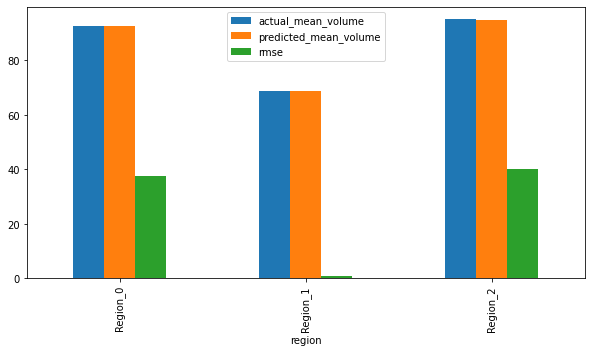

In [24]:
models.plot(kind='bar', x='region', figsize=(10,5))
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
Pada modelling LinearRegression diatas kita melakukan split data 25% untuk data valid dan 75% untuk training. Selain itu bisa dilihat pada tabel dan plot bar, volume rata-rata cadangan minyak (dalam ribuan barrel) yang diprediksi hampir sama dengan actual. Nanum Region_1 lah yang memiliki rmse paling kecil 0.89 diantara yang lainnya. Ini berarti pada Region_01 model untuk prediksi bagus karena mendekati dengan nilai actual.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Sip, sudah rapih. Inisiatif bagus menampilkan rata-rata volume pada actual dan predicted untuk melihat apakah model memiliki bias atau tidak.
</div>

# Langkah 3 : Persiapan Untuk Menghitung Laba <a id='langkah3'></a>

In [26]:
#Simpan semua nilai kunci untuk perhitungan laba pada variabel-variabel terpisah

region_points = 500 #dilakukan studi terhadap 500 titik
best_region_points = 200 #memilih 200 titik terbaik untuk perhitungan laba
budget = 100e6 #Anggaran untuk mengembangkan 200 sumur minyak adalah 100 juta USD
revenue_per_barel = 4.5 #Satu barel bahan mentah menghasilkan 4,5 USD pendapatan
revenue_per_product = 4500 #satu unit produk adalah 4.500 dolar (volume cadangan minyak dalam ribuan barel)
risk_of_losses = 0.025 #pertahankan hanya wilayah dengan risiko kerugian lebih rendah dari 2,5%

#Hitung volume cadangan minyak yang mencukupi untuk mengembangkan sumur baru tanpa kerugian
total_revenue = revenue_per_product * best_region_points
volume_of_reserve = round((budget / total_revenue),2)


#min_volume = round(100000000/(4500*200),2)
print('Volume cadangan minyak yang mencukupi untuk mengembangkan sumur baru tanpa kerugian adalah : %.2f' % volume_of_reserve)


Volume cadangan minyak yang mencukupi untuk mengembangkan sumur baru tanpa kerugian adalah : 111.11


<div style="background-color:rgba(0, 255, 172, 0.07)"
     
Pada perhitungan diatas volume cadangan minyak yang mencukupi untuk mengembangkan sumur baru tanpa kerugian adalah 111.11.
Pada langkah 2 prediksi volume cadangan minyak ketiga wilayah dibawah 111. Untuk itu perlu dilakukan analisa profit dengan meimilih sumur minyak terbaik dan memprediksinya lagi.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Oke, perhitungan sudah bagus.
</div>

# Langkah 4 : Menghitung laba dari kumpulan sumur minyak terpilih dan prediksi model <a id='langkah4'></a>

In [28]:
#fungsi
def profit_calculate(target_valid, predicted_valid, count):
    predicted_sorted = predicted_valid.sort_values(ascending=False) #Prediksi Volume Cadangan Minyak
    selected = target_valid[predicted_sorted.index][:count] #Sumur Minyak Terpilih
    total_selected = round((selected.sum() * 1000), 2) #Total Volume Cadangan Minyak
    total_selected_profit = round((total_selected * revenue_per_barel - budget),2) #Total Laba dari Volume Cadangan Minyak
    return total_selected, total_selected_profit

In [29]:
total_selected_0, total_selected_profit_0 = profit_calculate(target_valid_0, predicted_valid_0, 200)
total_selected_1, total_selected_profit_1 = profit_calculate(target_valid_1, predicted_valid_1, 200)
total_selected_2, total_selected_profit_2 = profit_calculate(target_valid_2, predicted_valid_2, 200)

In [30]:
profit = pd.DataFrame({
    'region': ['Region_0', 'Region_1', 'Region_2'],
    'total_selected': [total_selected_0, total_selected_1, total_selected_2],
    'total_selected_profit': [total_selected_profit_0, total_selected_profit_1, total_selected_profit_2]
})

In [31]:
profit

,region,total_selected,total_selected_profit
0,Region_0,29601835.65,33208260.42
1,Region_1,27589081.55,24150866.98
2,Region_2,28245222.14,27103499.63


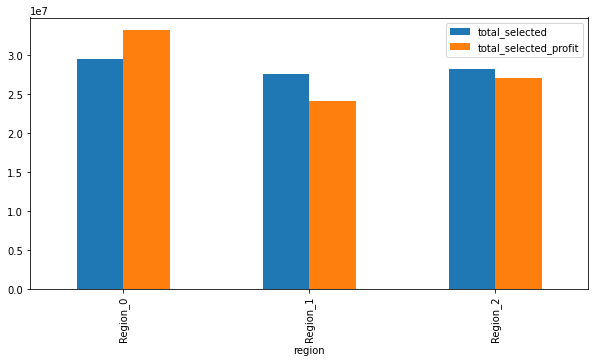

In [32]:
profit.plot(kind='bar', x='region', figsize=(10,5))
plt.show()

<div style="background-color:rgba(0, 255, 172, 0.07)"
     
Setelah dipilih 200 sumur minyak terpilih, didapatkan informasi Region_0 memiliki total cadangan minyak dan total profit paling tinggi daripada wilayah lainnya. Namun, perlu dilakukan bootstrapping model untuk mencari  keuntungan rata-rata, selang kepercayaan 95%, dan risiko kerugianya.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Sip, analisis laba dari hasil prediksi juga sudah sangat bagus.
</div>

# Langkah 5 : Menghitung Risiko Dan laba Untuk Setiap Wilayah <a id='langkah5'></a>

In [34]:
#fungsi bootstrapping_model

#Langkah4
def model_bootstrap(target_valid, predicted_valid, count):
    predicted_sorted = predicted_valid.sort_values(ascending=False) #Prediksi Volume Cadangan Minyak
    selected = target_valid[predicted_sorted.index][:count] #Sumur Minyak Terpilih
    total_selected = round((selected.sum() * 1000), 2) #Total Volume Cadangan Minyak
    total_selected_profit = round((total_selected * revenue_per_barel - budget),2) #Total Laba dari Volume Cadangan Minyak
    return total_selected_profit
    
#Bootstrapping
def bootstrap_profit(target_valid, predicted_valid):
    state = np.random.RandomState(12345)
    profit = []
    
    for i in range (1000):
        target_subsample = target_valid.sample(n=region_points, replace=True, random_state=state)
        predicted_subsample = predicted_valid[target_subsample.index]
        profit.append(model_bootstrap(target_subsample, predicted_subsample, best_region_points))
        
    profit = pd.Series(profit)
    
    mean_profit = round(profit.mean(),2)
    confidence_interval = st.t.interval(0.95, len(profit)-1, mean_profit, profit.sem())
    losses = profit[profit < 0]
    risk_of_losses = 100 * (len(losses) / len(profit))
    
    
    return mean_profit, confidence_interval, risk_of_losses

In [35]:
mean_profit_0, confidence_interval_0, risk_of_losses_0 = bootstrap_profit(target_valid_0, predicted_valid_0)
mean_profit_1, confidence_interval_1, risk_of_losses_1 = bootstrap_profit(target_valid_1, predicted_valid_1)
mean_profit_2, confidence_interval_2, risk_of_losses_2 = bootstrap_profit(target_valid_2, predicted_valid_2)

In [36]:
mean_profit_0, confidence_interval_0, risk_of_losses_0

(4259385.27, (4087322.071538591, 4431448.468461408), 6.0)

In [40]:
terakhir_profit = pd.DataFrame({
    'region': ['Region_0', 'Region_1', 'Region_2'],
    'mean_profit': [mean_profit_0, mean_profit_1, mean_profit_2],
    'confidence_interval': [confidence_interval_0, confidence_interval_1, confidence_interval_2],
    'risk_of_losses': [risk_of_losses_0, risk_of_losses_1, risk_of_losses_2]
})

In [38]:
bootstrap_profit

,region,mean_profit,confidence_interval,risk_of_losses
0,Region_0,4259385.27,"(4087322.071538591, 4431448.468461408)",6.0
1,Region_1,5152227.73,"(5016214.75736377, 5288240.702636231)",1.0
2,Region_2,4350083.63,"(4174535.5225975546, 4525631.737402445)",6.4


<div style="background-color:rgba(0, 255, 172, 0.07)"
     
Setelah dilkaukan bootstrapping dengan 1000 sample, Region_1 lah yang memiliki rata rata profit paling tinggi yaitu sekitar 5juta dan memiliki persentasi resiko paling kecil hanya 1%. Dibandingak wilayah lain yaitu sekitar 6%. Region_1 memiliki dispersi rata rata profit sekitar 17Juta. 
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Perhitungan laba dengan bootstrap dan analisis sudah bagus.
</div>

# Kesimpulan<a id='kesimpulan'></a>

<div style="background-color:rgba(0, 255, 172, 0.07)"

*Pada langkah pertama ini kita memuat dataframe geo_data_0, 1 dan 2. Tidak ada nilai null dan duplikat pada ketiga dataframe tersebut.
Dari tabel korelasi dan plot distribusi didapatkan informasi berikut :
- df_geo_0 untuk f2 memiliki korelasi positif 0.48 pada product. Dan f2 tersebut memiliki distribusi normal.
- df_geo_1 untuk f2 memiliki korelasi linear pada product. Namun f2 tersebut tidak memiliki distribusi normal.
- df_geo_2 untuk f2 memiliki korelasi positif 0.44 pada product. Dan pada f0, f1, dan f2 memiliki distribusi normal.
Langkah selanjutnya adalah melatih dan menguji model di setiap wilayah.

Pada modelling LinearRegression diatas kita melakukan split data 25% untuk data valid dan 75% untuk training. Selain itu bisa dilihat pada tabel dan plot bar, 
volume rata-rata cadangan minyak (dalam ribuan barrel) yang diprediksi hampir sama dengan actual. Nanum Region_1 lah yang memiliki rmse paling kecil 0.89 diantara yang lainnya. 
Ini berarti pada Region_01 model untuk prediksi bagus karena mendekati dengan nilai actual.

Pada perhitungan diatas volume cadangan minyak yang mencukupi untuk mengembangkan sumur baru tanpa kerugian adalah 111.11.
Pada langkah 2 prediksi volume cadangan minyak ketiga wilayah dibawah 111. Untuk itu perlu dilakukan analisa profit dengan meimilih sumur minyak terbaik dan memprediksinya lagi.

Setelah dipilih 200 sumur minyak terpilih, didapatkan informasi Region_0 memiliki total cadangan minyak dan total profit paling tinggi daripada wilayah lainnya. 
Namun, perlu dilakukan bootstrapping model untuk mencari  keuntungan rata-rata, selang kepercayaan 95%, dan risiko kerugianya.

Terakhir dilkaukan bootstrapping dengan 1000 sample, Region_1 lah yang memiliki rata rata profit paling tinggi yaitu sekitar 5juta dan memiliki persentasi resiko paling kecil hanya 1%. 
Dibandingak wilayah lain yaitu sekitar 6%. Region_1 memiliki dispersi rata rata profit sekitar 17Juta.

Dari finding dan insight diatas kami merekomendasikan wilayah lokasi yang cocok untuk penggalian sumur minyak baru yaitu df_geo_1.

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment v1</b> <a class="tocSkip"></a>

Kesimpulan akhir sudah bagus dan sudah ada rekomendasi.
</div>